In [1]:
import numpy as np

import tensorflow as tf
from zipfile import ZipFile 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

import wget

2023-11-13 20:24:18.336940: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
data= "https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip"
data= wget.download(data)
!unzip data

Archive:  data.zip
   creating: data/
   creating: data/test/
   creating: data/test/bee/
  inflating: data/test/bee/10007154554_026417cfd0_n.jpg  
  inflating: data/test/bee/10024864894_6dc54d4b34_n.jpg  
  inflating: data/test/bee/10092043833_7306dfd1f0_n.jpg  
  inflating: data/test/bee/1011948979_fc3637e779_w.jpg  
  inflating: data/test/bee/10128235063_dca17db76c_n.jpg  
  inflating: data/test/bee/10130729734_f68738333e_w.jpg  
  inflating: data/test/bee/10166485783_9cd6706c72_n.jpg  
  inflating: data/test/bee/10179824_84803290ac_m.jpg  
  inflating: data/test/bee/10197482094_0176d1bacb_n.jpg  
  inflating: data/test/bee/10242298546_aac12f5223_n.jpg  
  inflating: data/test/bee/10290912366_20f0dbdb0e_m.jpg  
  inflating: data/test/bee/10290912366_20f0dbdb0e_n.jpg  
  inflating: data/test/bee/10319307805_02d44f6555_m.jpg  
  inflating: data/test/bee/10319312035_07f21405de_n.jpg  
  inflating: data/test/bee/10330536605_77cd1d5e37_n.jpg  
  inflating: data/test/bee/10330536605_77cd1

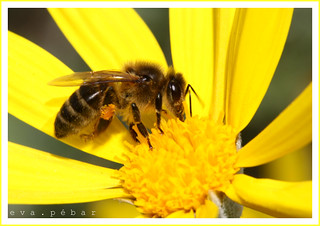

In [3]:
path = './data/train/bee'
name = '5621896609_4a11a34e1a_n.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [4]:
# Create a Sequential model
model = Sequential()

# Add a Convolutional layer with 32 filters, kernel size of (3, 3), and 'relu' activation
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))

# Add a MaxPooling layer with pooling size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the result to feed into a Dense layer
model.add(Flatten())

# Add a Dense layer with 64 neurons and 'relu' activation
model.add(Dense(64, activation='relu'))

# Add the output layer with 1 neuron and appropriate activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Define the SGD optimizer with specified parameters
sgd = SGD(lr=0.002, momentum=0.8)

# Compile the model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])


2023-11-13 20:24:45.372644: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-13 20:24:45.379376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-13 20:24:45.379636: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-13 20:24:45.380275: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

### Question 1

Answer: The best function is binary cross entropy


### Question 2

In [5]:
# Print a summary of the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

Answer: The number of parameters is 896

### Generators and Training

In [6]:
train_gen = ImageDataGenerator(rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

In [7]:
# Training and test data generation

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

test_ds = train_gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [8]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10


2023-11-13 20:25:34.419505: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-13 20:25:35.051503: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-13 20:25:35.052358: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-13 20:25:35.052401: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-13 20:25:35.053241: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-13 20:25:35.053320: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


184/184 [==============================] - 11s 48ms/step - loss: 0.6672 - accuracy: 0.5806 - val_loss: 0.5978 - val_accuracy: 0.6819
Epoch 2/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5937 - accuracy: 0.6845 - val_loss: 0.5517 - val_accuracy: 0.7418
Epoch 3/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5361 - accuracy: 0.7405 - val_loss: 0.5976 - val_accuracy: 0.6688
Epoch 4/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5048 - accuracy: 0.7623 - val_loss: 0.5478 - val_accuracy: 0.7233
Epoch 5/10
184/184 [==============================] - 9s 47ms/step - loss: 0.4815 - accuracy: 0.7871 - val_loss: 0.5910 - val_accuracy: 0.7070
Epoch 6/10
184/184 [==============================] - 9s 47ms/step - loss: 0.4476 - accuracy: 0.8004 - val_loss: 0.5395 - val_accuracy: 0.7440
Epoch 7/10
184/184 [==============================] - 9s 47ms/step - loss: 0.4286 - accuracy: 0.8075 - val_loss: 0.5212 - val_accuracy: 0.7418
Epoch 8/1

### Question 3

In [9]:
# Median train accuracy

train_acc = history.history['accuracy']
median_train_acc = np.median(train_acc)
median_train_acc

0.7937177121639252

Answer: The median of train accuracy is aprox 0.8

### Question 4

In [10]:
# Standard deviation training loss

train_loss = history.history['loss']
sd_training_loss= np.std(train_loss)
sd_training_loss

0.0948712980115318

Answer: The standard deviation of training loss is aprox 0.091

### Data Argumentation

In [11]:
# Training augmented model

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale=1./255)

In [12]:
# Training and test data generation

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

test_ds = train_gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [13]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 28s 150ms/step - loss: 0.4996 - accuracy: 0.7631 - val_loss: 0.5080 - val_accuracy: 0.7614
Epoch 2/10
184/184 [==============================] - 27s 149ms/step - loss: 0.4875 - accuracy: 0.7699 - val_loss: 0.5348 - val_accuracy: 0.7571
Epoch 3/10
184/184 [==============================] - 27s 149ms/step - loss: 0.4860 - accuracy: 0.7672 - val_loss: 0.4849 - val_accuracy: 0.7680
Epoch 4/10
184/184 [==============================] - 27s 149ms/step - loss: 0.4828 - accuracy: 0.7743 - val_loss: 0.4939 - val_accuracy: 0.7691
Epoch 5/10
184/184 [==============================] - 27s 149ms/step - loss: 0.4789 - accuracy: 0.7803 - val_loss: 0.4581 - val_accuracy: 0.7963
Epoch 6/10
184/184 [==============================] - 27s 149ms/step - loss: 0.4584 - accuracy: 0.7911 - val_loss: 0.4474 - val_accuracy: 0.7908
Epoch 7/10
184/184 [==============================] - 27s 148ms/step - loss: 0.4644 - accuracy: 0.7879 - val_loss: 0.4719 - val_ac

### Question 5

In [14]:
# Mean of test loss

val_loss = history.history['val_loss']
mean_test_loss = np.mean(val_loss)
mean_test_loss

0.47891601324081423

Answer: The mean test loss is aprox 0.48

### Question 6

In [15]:
# Average of test accuracy for the last 5 epochs (from 6 to 10)

val_acc = history.history['val_accuracy']
last_five_val_acc = val_acc[5:]
mean_test_accuracy_last5 = np.mean(last_five_val_acc)
mean_test_accuracy_last5

0.7884531617164612

Answer: The mean test accuracy for last 5 epochs is aprox 0.78